In [1]:
import tensorflow as tf
from keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 70

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "hb74ynkjcn-1",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 4502 files belonging to 12 classes.


In [4]:
class_names = dataset.class_names
class_names

['Alstonia Scholaris (P2)',
 'Arjun (P1)',
 'Bael (P4)',
 'Basil (P8)',
 'Chinar (P11)',
 'Gauva (P3)',
 'Jamun (P5)',
 'Jatropha (P6)',
 'Lemon (P10)',
 'Mango (P0)',
 'Pomegranate (P9)',
 'Pongamia Pinnata (P7)']

In [5]:
len(dataset)

141

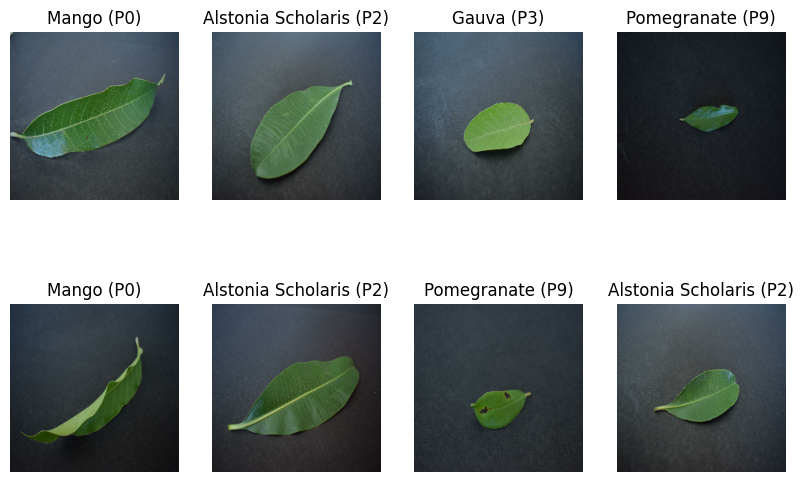

In [6]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(8):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

In [7]:

train_size = 0.8
len(dataset)*train_size

112.80000000000001

In [25]:
train_ds = dataset.take(112) 
len(train_ds)

112

In [26]:
test_ds = dataset.skip(112)
len(test_ds)

29

In [27]:
val_size=0.1
len(dataset)*val_size

14.100000000000001

In [28]:
val_ds = test_ds.take(14)
len(val_ds)

14

In [29]:
test_ds = test_ds.skip(14)
len(test_ds)

15

In [30]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, shuffle=True,shuffle_size=10000):
  
    ds_size = len(ds)
    
    if shuffle:
        ds= ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split * ds_size)
    val_size =int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds


In [31]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [32]:
len(train_ds)

112

In [33]:
len(val_ds)

14

In [34]:
len(test_ds)

15

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [36]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])


In [37]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    
])

In [38]:
input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE,CHANNELS)
n_classes=12
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),    
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes , activation='softmax'),
])
model.build(input_shape=input_shape)

In [39]:
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 sequential_4 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 conv2d_6 (Conv2D)           (32, 222, 222, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (32, 111, 111, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (32, 109, 109, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (32, 54, 54, 64)         0         
 2D)                                                  

In [40]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)


In [41]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)


Epoch 1/70
112/112 [==============================] - 366s 2s/step - loss: 2.2739 - accuracy: 0.1710 - val_loss: 1.9801 - val_accuracy: 0.2946
Epoch 2/70
112/112 [==============================] - 152s 1s/step - loss: 1.9659 - accuracy: 0.2960 - val_loss: 1.7894 - val_accuracy: 0.3371
Epoch 3/70
112/112 [==============================] - 146s 1s/step - loss: 1.6706 - accuracy: 0.4032 - val_loss: 1.4308 - val_accuracy: 0.4955
Epoch 4/70
112/112 [==============================] - 149s 1s/step - loss: 1.5048 - accuracy: 0.4785 - val_loss: 1.5422 - val_accuracy: 0.4487
Epoch 5/70
112/112 [==============================] - 154s 1s/step - loss: 1.3109 - accuracy: 0.5431 - val_loss: 1.1098 - val_accuracy: 0.6205
Epoch 6/70
112/112 [==============================] - 156s 1s/step - loss: 1.1535 - accuracy: 0.5979 - val_loss: 1.0564 - val_accuracy: 0.6317
Epoch 7/70
112/112 [==============================] - 155s 1s/step - loss: 1.0712 - accuracy: 0.6279 - val_loss: 1.0886 - val_accuracy: 0.6228

Epoch 58/70
112/112 [==============================] - 155s 1s/step - loss: 0.2089 - accuracy: 0.9261 - val_loss: 0.1405 - val_accuracy: 0.9554
Epoch 59/70
112/112 [==============================] - 160s 1s/step - loss: 0.1796 - accuracy: 0.9396 - val_loss: 0.1853 - val_accuracy: 0.9464
Epoch 60/70
112/112 [==============================] - 165s 1s/step - loss: 0.2618 - accuracy: 0.9138 - val_loss: 0.3348 - val_accuracy: 0.8884
Epoch 61/70
112/112 [==============================] - 170s 2s/step - loss: 0.2397 - accuracy: 0.9191 - val_loss: 0.1626 - val_accuracy: 0.9509
Epoch 62/70
112/112 [==============================] - 166s 1s/step - loss: 0.2023 - accuracy: 0.9328 - val_loss: 0.1908 - val_accuracy: 0.9464
Epoch 63/70
112/112 [==============================] - 156s 1s/step - loss: 0.1748 - accuracy: 0.9410 - val_loss: 0.2817 - val_accuracy: 0.9152
Epoch 64/70
112/112 [==============================] - 159s 1s/step - loss: 0.1720 - accuracy: 0.9390 - val_loss: 0.1703 - val_accuracy:

In [43]:
scores=model.evaluate(test_ds)

15/15 [==============================] - 4s 239ms/step - loss: 0.1922 - accuracy: 0.9312


In [44]:
scores


[0.19220660626888275, 0.9312499761581421]

In [45]:
history

In [46]:
history.params

{'verbose': 1, 'epochs': 70, 'steps': 112}

In [47]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [48]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

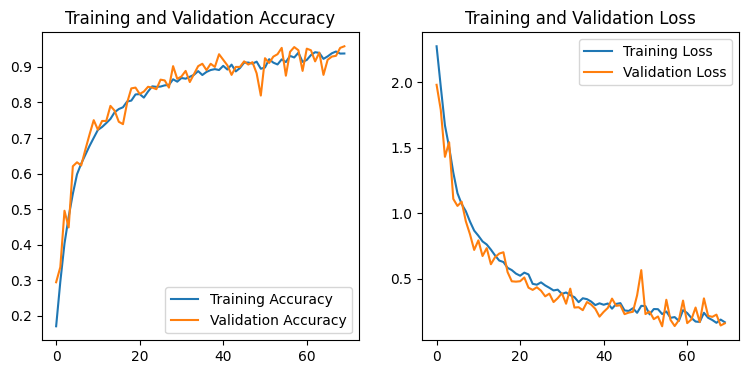

In [49]:
plt.figure(figsize=(9,4))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label = 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = 'Training Loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

first image to predict
actual label: Arjun (P1)
1/1 [==============================] - 1s 990ms/step
predicted label: Arjun (P1)


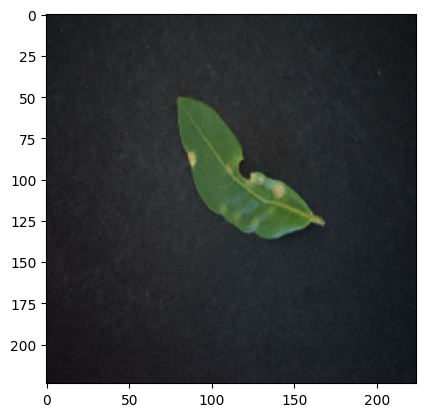

In [50]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [51]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array,0)
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.argmax(predictions[0])))
    return predicted_class,confidence

1/1 [==============================] - 0s 50ms/step


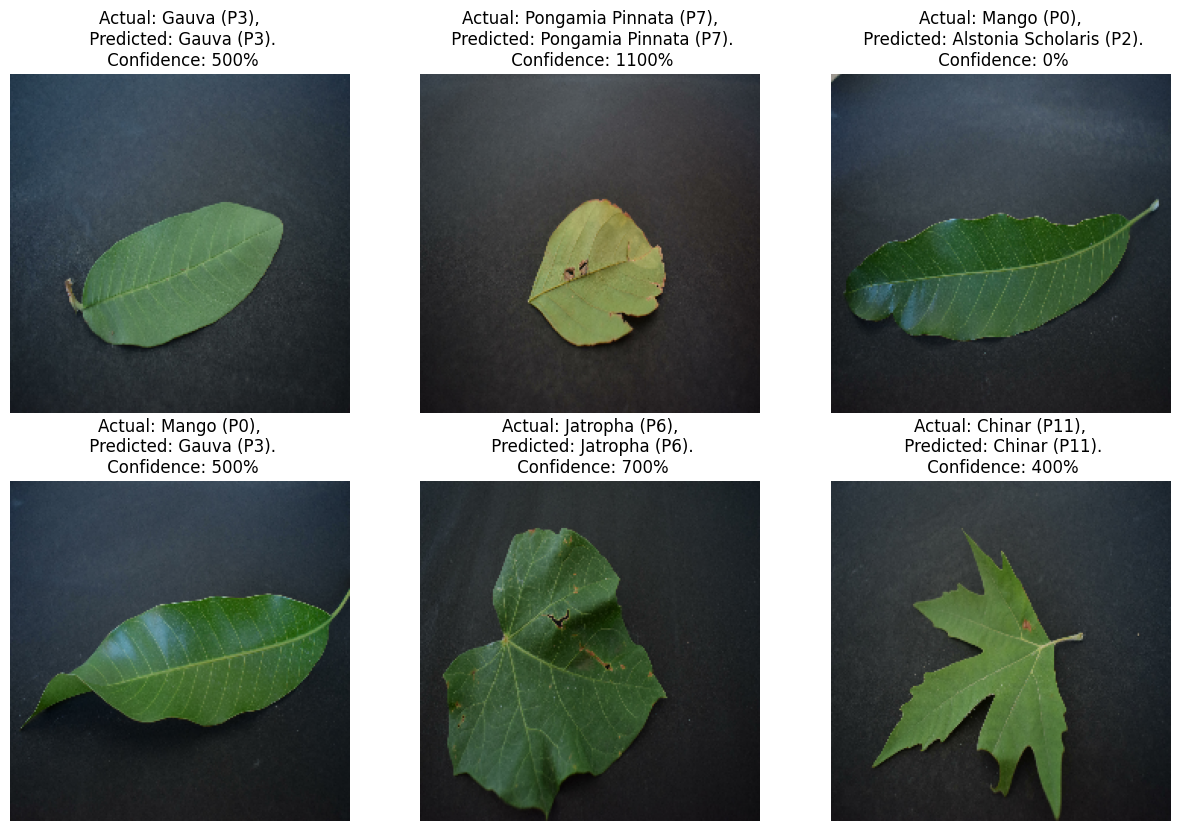

In [52]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")   
        plt.axis("off")

In [139]:
model_version = 1
model.save(f"../model/{model_version}")
           
           

INFO:tensorflow:Assets written to: ../model/1\assets


INFO:tensorflow:Assets written to: ../model/1\assets


In [60]:
from keras.models import load_model
model.save(f"mp")

INFO:tensorflow:Assets written to: mp\assets


INFO:tensorflow:Assets written to: mp\assets
